<a href="https://colab.research.google.com/github/Josepsimoes/Otimizacao_De_Portifolio_e_Backtest.1/blob/main/Otimiza%C3%A7%C3%A3o_de_Portf%C3%B3lio_e_Backtest_(18_11_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTALANDO AS BIBLIOTECAS

In [ ]:
!pip install PyPortfolioOpt
!pip install yfinance
!pip install vectorbt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 3.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 4.8 MB/s 
     |████████████████████████████████| 292 kB 48.3 MB/s 
     |████████████████████████████████| 1.6 MB 41.5 MB/s 
     |████████████████████████████████| 749 kB 41.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


## IMPORTANDO AS BIBLIOTECAS

In [ ]:
import yfinance as yf
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import plotting
import matplotlib.pyplot as plt
import numpy as np
import vectorbt as vbt

## SELECIONANDO OS ATIVOS DO PORTIFÓLIO

In [ ]:
ativos = ['WEGE3.SA', 'BBSE3.SA', 'HYPE3.SA', 'MDIA3.SA', 'ITSA4.SA']

## ESTIMAR OS PARÂMETROS

In [ ]:
df = yf.download(ativos, start ='2010-01-01', end='2018-12-30')['Adj Close']

[*********************100%***********************]  5 of 5 completed


## TESTE OUT-OF-SAMPLE

In [ ]:
df_out = yf.download(ativos, start='2019-01-01', end='2022-12-30')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [ ]:
df

,BBSE3.SA,HYPE3.SA,ITSA4.SA,MDIA3.SA,WEGE3.SA
Date,,,,,
2010-01-04,NaN,16.004566,3.179553,10.582230,2.096499
2010-01-05,NaN,16.215565,3.169270,10.618712,2.091924
2010-01-06,NaN,16.848558,3.130716,10.735973,2.103361
2010-01-07,NaN,17.051744,3.112722,10.691673,2.138818
2010-01-08,NaN,17.504995,3.089589,10.613498,2.216593
...,...,...,...,...,...
2018-12-20,19.765047,26.436960,8.508906,38.270317,8.170073
2018-12-21,20.246754,26.333124,8.415797,38.546219,8.212697
2018-12-26,20.171486,26.176558,8.308362,38.127914,8.075609


In [ ]:
df_out

,BBSE3.SA,HYPE3.SA,ITSA4.SA,MDIA3.SA,WEGE3.SA
Date,,,,,
2019-01-02,21.315542,27.270899,9.060410,40.403152,8.541144
2019-01-03,21.548866,27.664860,9.139197,41.463562,8.735908
2019-01-04,21.338121,27.533539,9.110545,41.418629,8.835667
2019-01-07,21.021999,27.095808,9.103386,41.876938,8.697904
2019-01-08,20.713408,27.052034,9.225144,41.652275,8.626651
...,...,...,...,...,...
2022-11-10,29.950001,47.209999,9.018181,39.950001,39.230000
2022-11-11,30.379999,46.790001,8.840000,39.099998,39.990002
2022-11-14,30.990000,47.580002,8.950000,39.849998,40.660000


## ESTIMANDO PARÂMETROS

## MATRIZ DE COVARIÂNCIA

In [ ]:
matriz_cov = risk_models.CovarianceShrinkage(df).ledoit_wolf()

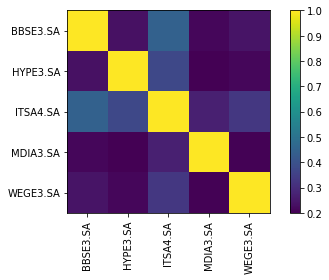

In [ ]:
plotting.plot_covariance(matriz_cov, plot_correlation=True)

## ESTIMANDO RETORNOS DOS ATIVOS


In [ ]:
retorno_estimado = expected_returns.mean_historical_return(df)
retorno_estimado

BBSE3.SA    0.166805
HYPE3.SA    0.058338
ITSA4.SA    0.119715
MDIA3.SA    0.156926
WEGE3.SA    0.168662
dtype: float64

## MODELO DE OTIMIZAÇÃO DE ALOCAÇÃO

In [ ]:
ef = EfficientFrontier(None, matriz_cov)
ef.min_volatility()
pesos = ef.clean_weights()
pesos

OrderedDict([('BBSE3.SA', 0.34153),
             ('HYPE3.SA', 0.13281),
             ('ITSA4.SA', 0.0427),
             ('MDIA3.SA', 0.21889),
             ('WEGE3.SA', 0.26407)])

In [ ]:
pesos.values()

odict_values([0.34153, 0.13281, 0.0427, 0.21889, 0.26407])

In [ ]:
pesos_ = pesos.values()
pesos_ = list(pesos_)
pesos_ = np.array(pesos_)
pesos_

array([0.34153, 0.13281, 0.0427 , 0.21889, 0.26407])

## BACKTEST DO PORTIFÓLIO


In [ ]:
pesos_otimizados = np.full_like(df_out, np.nan)
pesos_otimizados[0,:] = pesos_
print(pesos_otimizados.shape)

(963, 5)


## CONSTRUÇÃO DO BACKTEST NA VECTORBT

In [ ]:
pyopt_pf = vbt.Portfolio.from_orders(
    close=df_out,
    size = pesos_otimizados,
    size_type='targetpercent',
    group_by=True,
    cash_sharing=True,
    freq='d'

)

In [ ]:
pyopt_pf.stats()

Start                         2019-01-02 00:00:00
End                           2022-11-17 00:00:00
Period                          963 days 00:00:00
Start Value                                 100.0
End Value                              216.958759
Total Return [%]                       116.958759
Benchmark Return [%]                    92.180737
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        35.425813
Max Drawdown Duration           442 days 00:00:00
Total Trades                                    5
Total Closed Trades                             0
Total Open Trades                               5
Open Trade PnL                         116.958759
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [ ]:
pyopt_pf.plot().show()

In [ ]:
pyopt_pf.plot_underwater().show()

In [ ]:
pyopt_pf.drawdowns.plot(top_n=3).show()

## COMPARAÇÃO DS VOLATILIDADE ENTRE AS CARTEIRAS

## CALCULAR OS RETORNOS

In [ ]:
carteira_parametro = df.pct_change()

## CALCULAR A MATRIZ DE COVARIÂNCIA 

In [ ]:
cov_parametro = carteira_parametro.cov()

vol_parametro = np.sqrt(np.dot(pesos_.T, np.dot(cov_parametro, pesos_)))
vol_parametro_anual = vol_parametro*np.sqrt(252)
vol_parametro_anual

0.20448886781851475

## PESOS DO BENCHMARK

In [ ]:
pesos = np.array([0.20,0.20,0.20,0.20,0.20,])
carteira_benchmark = df_out.pct_change()
cov_ben = carteira_benchmark.cov()

vol_bench = np.sqrt(np.dot(pesos.T, np.dot(cov_ben, pesos)))
vol_bench_anual = vol_bench*np.sqrt(252)
vol_bench_anual

0.25975871220750074